In [21]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
from sklearn.neural_network import MLPRegressor
%matplotlib inline 
sns.set(style="ticks")

In [22]:
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = pd.Series(diabetes.target)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.8, random_state=1)

In [24]:
def get_mean_absolute_error(model):  
    target1 = ab1.predict(X_test)
    return mean_absolute_error(y_test, target1)

# Boosting

In [25]:
ab1 = AdaBoostRegressor(n_estimators=5, random_state=10)
ab1.fit(X_train, y_train)

bst_error = get_mean_absolute_error(ab1)

ls = [bst_error]
bst_error

53.761369406388894

# Bagging

In [26]:
bag1 = BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)
bag1.fit(X_train, y_train)

bag_error = get_mean_absolute_error(bag1)

ls.append(bag_error)
get_mean_absolute_error(bag1)

C:\Users\prite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_bagging.py:1253: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


53.761369406388894

# Stacking

In [27]:
dataset = Dataset(X_train, y_train, X_test)

In [28]:
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: линейная регрессия

model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
pipeline = ModelsPipeline(model_tree)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

ls.append(get_mean_absolute_error(results))

Metric: mean_absolute_error
Folds accuracy: [66.51167877786833, 69.3507471513273, 48.40985503104768, 61.796529468775475, 54.27968045168703, 40.43980193427986, 48.07677534665627, 38.735365752869015, 57.848093689165, 77.01094737191416]
Mean accuracy: 56.245947497559015
Standard Deviation: 11.958857389319805
Variance: 143.0142700580889


# MLP

In [29]:
mlp1 = MLPRegressor()
mlp1.fit(X_train, y_train)

mlp1_error = get_mean_absolute_error(mlp1)

ls.append(mlp1_error)
get_mean_absolute_error(mlp1_error)

C:\Users\prite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


53.761369406388894

# Gmdh

In [30]:
from gmdhpy import gmdh
gmdh1 = gmdh.Regressor(criterion_type='bias_retrain')

gmdh1.fit(X_train, y_train)

gmdh1_error = get_mean_absolute_error(gmdh1)

ls.append(gmdh1_error)
get_mean_absolute_error(gmdh1_error)

train layer0 in 0.12 sec
train layer1 in 0.44 sec
train layer2 in 0.44 sec
train layer3 in 0.34 sec
train layer4 in 0.32 sec
train layer5 in 0.39 sec
train layer6 in 0.38 sec
train layer7 in 0.33 sec
train layer8 in 0.38 sec
train layer9 in 0.30 sec
train layer10 in 0.30 sec
train layer11 in 0.32 sec
train layer12 in 0.35 sec


53.761369406388894

[53.761369406388894,
 53.761369406388894,
 53.761369406388894,
 53.761369406388894,
 53.761369406388894]

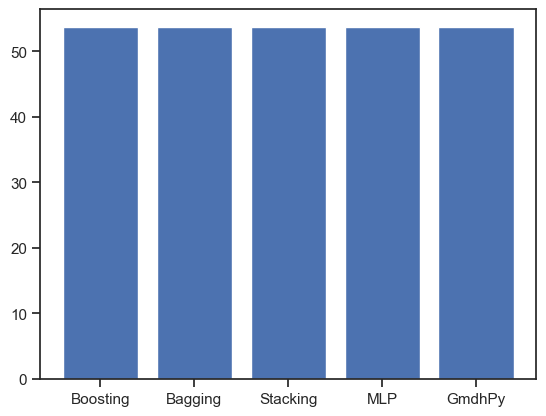

In [31]:
x = np.arange(len(ls))
plt.bar(x, height=ls)
plt.xticks(x, ['Boosting','Bagging','Stacking', 'MLP', 'GmdhPy']);
ls